In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

In [6]:
df = pd.read_csv('COVID19_state.csv')
df.columns

Index(['State', 'Tested', 'Infected', 'Deaths', 'Gini', 'ICU Beds',
       'Total Population', '60plus', '60plus per bed', '60plus pct pop',
       'Income Per Capita', 'GDP Per Capita', 'Unemployment', 'Sex Ratio',
       'Smoking Rate', 'Median Age', 'Median Age M', 'Median Age F',
       'Flu Deaths', 'Respiratory Deaths', 'Physicians', 'Hospitals',
       'Health Spending', 'Pollution', 'Med-Large Airports', 'Avg Temp'],
      dtype='object')

In [12]:
y_cases = df['Infected']
y_deaths = df['Deaths']
demo = ['Gini', 'Total Population', '60plus', '60plus pct pop', 'Income Per Capita', 
        'GDP Per Capita', 'Unemployment', 'Sex Ratio', 'Median Age', 'Median Age M', 'Median Age F',
        'Med-Large Airports', 'Avg Temp']
med = ['Total Population', 'Tested', 'ICU Beds', '60plus', '60plus per bed', 'Sex Ratio', 
       'Smoking Rate', 'Median Age', 'Median Age M', 'Median Age F', 'Flu Deaths', 'Respiratory Deaths', 
       'Physicians', 'Hospitals', 'Pollution']
X_demo = df[demo]
X_med = df[med]

## Correlation

In [8]:
def make_corr_map(df, title='Correlation Heat Map'):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(title)
    plt.show()

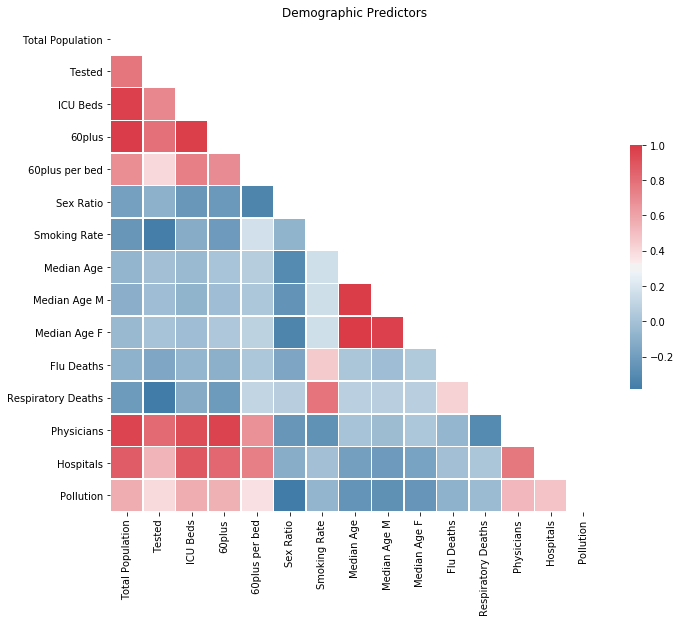

In [13]:
make_corr_map(X_med, 'Demographic Predictors')

In [16]:
df.sort_values('60plus', ascending=False)

,State,Tested,Infected,Deaths,Gini,ICU Beds,Total Population,60plus,60plus per bed,60plus pct pop,...,Median Age M,Median Age F,Flu Deaths,Respiratory Deaths,Physicians,Hospitals,Health Spending,Pollution,Med-Large Airports,Avg Temp
4,California,89600,4643,101.0,0.4899,7338,38982847,7292299,68758.0,0.187064,...,35.2,37.5,15.6,30.9,112906,359,7549,12.8,9.0,59.40
9,Florida,50528,4950,60.0,0.4852,5604,20278447,5200132,52222.0,0.256436,...,40.3,43.5,9.6,37.0,56499,217,8076,7.4,7.0,70.70
43,Texas,25483,2552,34.0,0.4800,6199,27419612,4618463,99694.0,0.168436,...,33.5,35.4,12.9,39.7,64602,523,6998,8.3,6.0,64.80
34,New York,65589,59513,672.0,0.5229,3952,19798228,4201533,72521.0,0.212218,...,37.1,40.2,18.4,28.5,89500,166,9778,6.6,3.0,45.40
38,Pennsylvania,33455,3394,38.0,0.4689,3169,12790505,3027054,82627.0,0.236664,...,39.1,42.4,15.5,35.1,51069,199,9258,9.2,2.0,48.80
14,Illinois,27762,4596,65.0,0.4810,3144,12854526,2614633,57547.0,0.203402,...,36.6,39.2,16.3,36.2,43377,187,8262,9.3,2.0,51.80
35,Ohio,1793,1653,29.0,0.4680,3314,11609756,2593757,97902.0,0.223412,...,37.8,40.8,15.7,49.0,42373,194,8712,8.5,3.0,50.70
22,Michigan,15613,5486,132.0,0.4695,2423,9925568,2227519,78461.0,0.224422,...,38.2,41.0,14.5,44.1,38819,144,8055,8.0,1.0,44.40
27,North Carolina,18945,1167,5.0,0.4780,2227,10052564,2115334,92630.0,0.210427,...,37.1,40.1,16.9,42.6,28379,112,7264,7.2,2.0,59.00
31,New Jersey,35602,13386,161.0,0.4813,1822,8960161,1892597,30961.0,0.211224,...,38.2,41.4,12.6,28.0,30502,82,8859,8.1,1.0,52.70


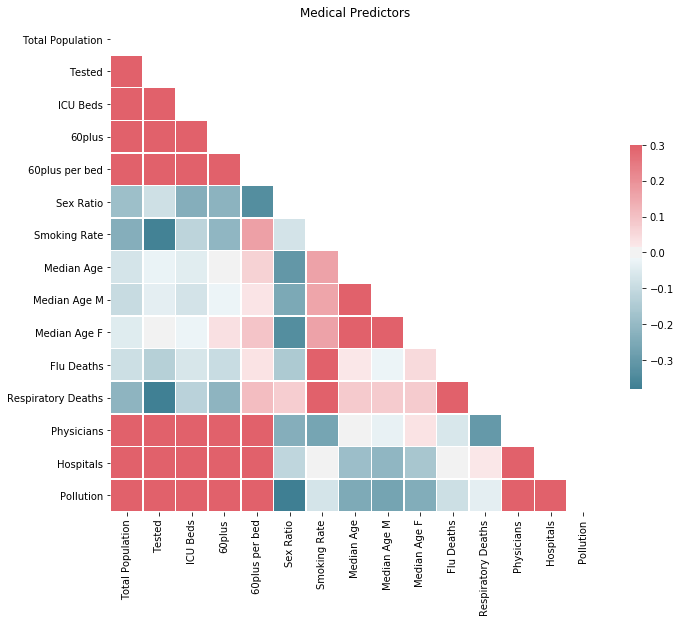

In [6]:
make_corr_map(X_med, 'Medical Predictors')

## Scaling

In [7]:
X_s = RobustScaler().fit_transform(X_demo)

## XGBoost

Score 0.6106512907143367


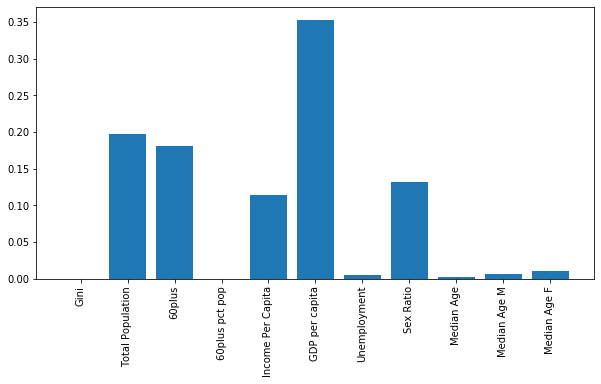

In [9]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_s, y_cases)
print('Score', xg_reg.score(X_s, y_cases))
plt.figure(figsize=(10,5))
plt.bar(X_demo.columns, xg_reg.feature_importances_)
plt.xticks(fontsize=10, rotation=90)
plt.show()

## Random Forest

score 0.7777688317346138 



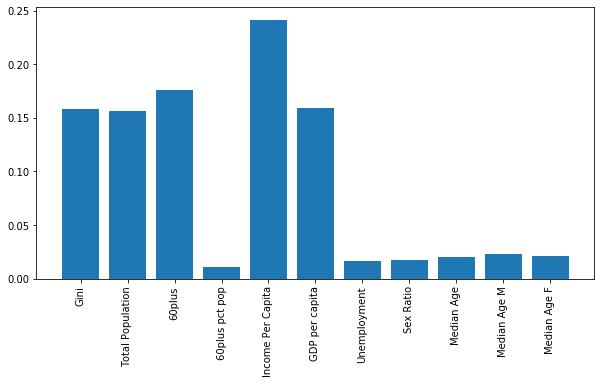

In [10]:
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(X_s, y_cases)
print('score', rfr.score(X_s, y_cases), '\n')
plt.figure(figsize=(10,5))
plt.bar(X_demo.columns, rfr.feature_importances_)
plt.xticks(fontsize=10, rotation=90)
plt.show()

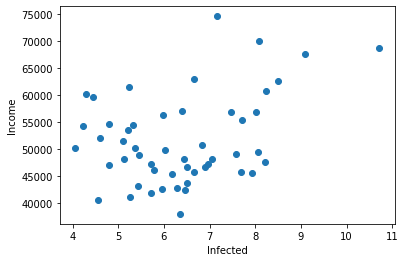

In [28]:
plt.scatter(np.log(df['Infected']), df['Income Per Capita'])
plt.xlabel('Infected')
plt.ylabel('Income')
plt.show()

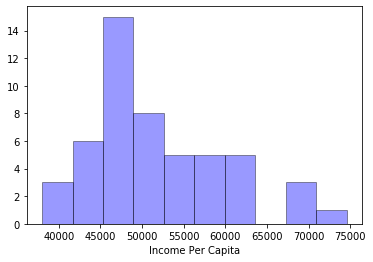

In [25]:
# seaborn histogram
sns.distplot(df['Income Per Capita'], hist=True, kde=False, 
             bins=10, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.show()

# Next steps, remove highly correlated features or perform some sort of feature reduction